<a href="https://colab.research.google.com/github/nestrada79/MSDA/blob/main/D206/D206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import package statements and user defined functions

In [ ]:
#Import packages
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt




#Options

#Ensures pandas dataframes aren't truntuacted
pd.set_option('display.max_columns', None)

#  **Part I: Research Question**

Does the administration of vitamin D supplements impact readmission rates or the severity of complications for specific medical conditions?



## Section B: Variables Description

Describe all variables in the data set (regardless of the research question) and indicate the data type for each variable. Use examples from the data set to support your claims.

## Data Dictionary


The data set includes the following information:
- Patients who are readmitted to the hospital within a month of release (the "ReAdmis" column)
- Patient medical conditions (high blood pressure, stroke, obesity, arthritis, diabetes, etc.)
- Patient information (service they received while hospitalized, days in hospital, type of initial admission, etc.)
- Patient demographic information (gender, age, job, education level, etc.)

The data set consists of 10,000 customers and 50 columns/variables.

| Column              | Description                                                           | Type        | Example |
|---------------------|-----------------------------------------------------------------------|-------------|---------|
| Unnamed: 0          | A placeholder variable to preserve the original order of the raw data file | Quantitative |     1    |
| CaseOrder           | A unique identifier for each case                                      | Quantitative |      1   |
| Customer_id         | Unique patient ID                                                     | Qualitative |  C412403   |
| Interaction         | Unique IDs related to patient transactions procedures and admissions  | Qualitative |    8cd49b13-f45a-4b47-a2bd-173ffa932c2f     |
| UID                 | Unique identifier                                                     | Qualitative |         | 8cd49b13-f45a-4b47-a2bd-173ffa932c2f
| City                | Patient city of residence as listed on the billing statement          | Qualitative | Eva         |
| State               | Patient state of residence as listed on the billing statement         | Qualitative | AL        |
| County              | Patient county of residence as listed on the billing statement        | Qualitative |   Morgan      |
| Zip                 | Patient zip code of residence as listed on the billing statement      | Quantitative |    35621     |
| Lat                 | GPS coordinates of patient residence as listed on the billing statement | Quantitative | 34.34960        |
| Lng                 | GPS coordinates of patient residence as listed on the billing statement | Quantitative | -86.72508     |
| Population          | Population within a mile radius of the patient, based on census data  | Quantitative | 11303        |
| Area                | Area type (urban, suburban) based on unofficial census data            | Qualitative | Urban        |
| Timezone            | Time zone of patient residence based on patient's sign up information | Qualitative | America/Chicago        |
| Job                 | Job of the patient (or primary insurance holder) as reported in the admissions information | Qualitative | Psychologist, sport and exercise	        |
| Children            | Number of children in the patient's household as reported in the admissions information | Quantitative | 1.0        |
| Age                 | Age of the patient as reported in admissions information              | Quantitative |  53.0       |
| Education           | Highest earned degree of the patient as reported in admissions information | Qualitative | Some College, Less than 1 Year        |
| Employment          | Employment status of the patient as reported in admissions information | Qualitative | Full Time        |
| Income              | Annual income of the patient (or primary insurance holder) as reported at the time of admission | Quantitative | 86575.93        |
| Marital             | Marital status of the patient (or primary insurance holder) as reported on admission information | Qualitative | Divorce         |
| Gender              | Customer self-identification as male, female, or nonbinary            | Qualitative | Male        |
| ReAdmis             | Whether the patient was readmitted within a month of release or not   | Qualitative | No       |
| VitD_levels         | The patient's vitamin D levels as measured in ng/mL                   | Quantitative | 17.80233        |
| Doc_visits          | Number of times the primary physician visited the patient during the initial hospitalization | Quantitative |         |
| Full_meals_eaten    | Number of full meals the patient ate while hospitalized (partial meals count as 0, and some patients had more than three meals in a day if requested) | Quantitative |         |
| VitD_supp           | The number of times that vitamin D supplements were administered to the patient | Quantitative |         |
| Soft_drink          | Whether the patient habitually drinks three or more sodas in a day    | Qualitative |         |
| Initial_admin       | The means by which the patient was admitted into the hospital initially (emergency admission, elective admission, observation) | Qualitative |         |
| HighBlood           | Whether the patient has high blood pressure                           | Qualitative |         |
| Stroke              | Whether the patient has had a stroke                                   | Qualitative |         |
| Complication_risk   | Level of complication risk for the patient as assessed by a primary patient assessment (high, medium, low) | Qualitative |         |
| Overweight          | Whether the patient is considered overweight based on age, gender, and height | Quantitative |         |
| Arthritis           | Whether the patient has arthritis                                      | Qualitative |         |
| Diabetes            | Whether the patient has diabetes                                       | Qualitative |         |
| Hyperlipidemia      | Whether the patient has hyperlipidemia                                 | Qualitative |         |
| BackPain            | Whether the patient has chronic back pain                              | Qualitative |         |
| Anxiety             | Whether the patient has an anxiety disorder                            | Quantitative |         |
| Allergic_rhinitis   | Whether the patient has allergic rhinitis                              | Qualitative |         |
| Reflux_esophagitis  | Whether the patient has reflux esophagitis                             | Qualitative |         |
| Asthma              | Whether the patient has asthma                                         | Qualitative |         |
| Services            | Primary service the patient received while hospitalized (blood work, intravenous, CT scan, MRI) | Qualitative |         |
| Initial_days        | The number of days the patient stayed in the hospital during the initial visit | Quantitative |         |
| TotalCharge         | The amount charged to the patient daily. This value reflects an average per patient based on the total charge divided by the number of days hospitalized. | Quantitative |         |
| Additional_charges  | The average amount charged to the patient for miscellaneous procedures, treatments, medicines, anesthesiology, etc | Quantitative |         |
| Item1               | Rating for the importance of Timely admission                          | Quantitative |         |
| Item2               | Rating for the importance of Timely treatment                          | Quantitative |         |
| Item3               | Rating for the importance of Timely visits                            


# **Part II: Data-Cleaning Plan**

## Section C: Data Cleaning Plan Explanation



### Subsection C1: Data Quality Assessment Plan

### **Visual Assessment:**
Visual inspection allows me to quickly get an overview of the data and identify potential issues that may not be immediately apparent from summary statistics. I will use visualizations such as:

**Sample Rows:** Displaying a sample of the data using head(), tail(), and sample() to observe the actual values and formats of the data.

**Missing Value Patterns:** Visualizing missing values using the missingno library to identify any patterns or clusters of missing data.

**Distribution Plots:** Creating histograms, box plots, or density plots to check the distribution of numerical variables and identify potential outliers or skewness.

**Categorical Plots:** Using bar charts or count plots to examine the distribution of categorical variables and detect any unexpected or inconsistent categories.

### **Programmatic Assessment:**
The programmatic approach helps to systematically identify specific issues and gather quantitative information about the data. I will perform the following:

**Data Types:** Using the info() attribute of the DataFrame to verify the correct data types for each column.

**Missing Values:** Utilizing the isnull() function to identify missing values in each column and then counting the number of missing values using sum().

**Duplicate Rows:** Checking for duplicate rows using the duplicated() function and counting the occurrences of duplicates using sum().

**Data Summary:** Employing the info() and describe() functions to obtain data types, non-null counts, and summary statistics for numerical columns.

**Categorical Values:** Using value_counts() to count unique values for categorical columns and check for any unexpected or inconsistent categories.

**Cross-Tabulations:** Creating cross-tabulations using pd.crosstab() to identify potential issues or inconsistencies between columns.

### Subsection C2: Justification for Data Quality Assessment Approach


**Explain the characteristics of the data being assessed:**

Based on the .info(), the dataset consists of 10,000 rows and 53 columns. Here are some key characteristics of the data being assessed:

**Data Types:** The dataset contains columns with different data types, such as integers (int64), floating-point numbers (float64), and objects (object). The object type typically represents string or categorical data.

**Missing Values:** Some columns have missing values. For example, the "Children," "Age," "Income," "Soft_drink," "Overweight," "Anxiety," "Initial_days" columns have missing values.

**Geographic Information:** The dataset contains geographic information such as "City," "State," "County," "Zip," "Lat," and "Lng."

**Demographic Information:** There are columns related to demographic information such as "Job," "Education," "Employment," "Marital," and "Gender."

**Health-related Information:** Several columns contain health-related information, including "VitD_levels," "Doc_visits," "Full_meals_eaten," "VitD_supp," "HighBlood," "Stroke," "Complication_risk," "Arthritis," "Diabetes," "Hyperlipidemia," "BackPain," "Allergic_rhinitis," "Reflux_esophagitis," and "Asthma."

**Medical Services and Charges:** The dataset includes information about medical services, charges, and items used, such as "Services," "Initial_days," "TotalCharge," "Additional_charges," and various "Item" columns.


**Justification:**

By combining both visual and programmatic assessments, I can get a comprehensive understanding of the data's quality from different perspectives.

Visualizations help identify patterns and outliers that may not be evident in summary statistics alone.

Programmatic assessment provides concrete numbers and statistics for missing values, duplicates, and data types.

The approach is scalable and can be applied to large datasets efficiently.

The combination of visual and programmatic assessments ensures that potential data issues are not overlooked, and any identified quality issues can be addressed during the data cleaning process.

### Subsection C3: Justification for Selected Programming Language and Libraries



**Justification for Using Python for Data Cleaning:**


Python is the ideal choice for cleaning the given dataset due to its rich ecosystem of data libraries, such as Pandas and NumPy. These libraries offer powerful tools for handling missing values, removing duplicates, transforming data, and validating data integrity. As the programming language I have the most experience with, using Python allows for a more efficient and effective data cleaning process, enabling me to quickly and confidently prepare the data for analysis.

### Subsection C4: Annotated Code for Data Quality Assessment

In [ ]:
#Load dataset into pandas dataframe
df = pd.read_csv('/content/medical_raw_data.csv')

##### **Initial dataframe inspection**

Displaying a sample of the data using head(), tail(), and sample() to observe the actual values and formats of the data.

In [ ]:
#Checking that the data frame has loaded correctly
df

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1.0,53.0,"Some College, Less than 1 Year",Full Time,86575.93,Divorced,Male,No,17.802330,6,0,0,NaN,Emergency Admission,Yes,No,Medium,0.0,Yes,Yes,No,Yes,1.0,Yes,No,Yes,Blood Work,10.585770,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3.0,51.0,"Some College, 1 or More Years, No Degree",Full Time,46805.99,Married,Female,No,18.994640,4,2,1,No,Emergency Admission,Yes,No,High,1.0,No,No,No,No,NaN,No,Yes,No,Intravenous,15.129562,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3.0,53.0,"Some College, 1 or More Years, No Degree",Retired,14370.14,Widowed,Female,No,17.415889,4,1,0,No,Elective Admission,Yes,No,Medium,1.0,No,Yes,No,No,NaN,No,No,No,Blood Work,4.772177,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0.0,78.0,GED or Alternative Credential,Retired,39741.49,Married,Male,No,17.420079,4,1,0,No,Elective Admission,No,Yes,Medium,0.0,Yes,No,No,No,NaN,No,Yes,Yes,Blood Work,1.714879,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,NaN,22.0,Regular High School Diploma,Full Time,1209.56,Widowed,Female,No,16.870524,5,0,2,Yes,Elective Admission,No,No,Low,0.0,No,No,Yes,No,0.0,Yes,No,No,CT Scan,1.254807,1885.655137,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,4762,Urban,America/New_York,"Programmer, multimedia",NaN,25.0,Bachelor's Degree,Student,45967.61,Widowed,Male,No,16.481612,4,2,1,No,Emergency Admission,Yes,No,Medium,NaN,No,No,No,No,1.0,No,Yes,No,Intravenous,51.561217,6651.241294,8927.642189,3,2,2,3,4,3,4,2
9996,9997,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,1251,Urban,America/New_York,"Restaurant manager, fast food",4.0,87.0,Regular High School Diploma,Full Time,14983.02,Widowed,Male,Yes,18.451601,5,0,0,No,Elective Admission,Yes,No,Medium,1.0,Yes,Yes,No,No,0.0,No,No,Yes,CT Scan,68.668237,7851.522660,28507.147340,3,3,4,2,5,3,4,4
9997,9998,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,532,Rural,America/Chicago,"Psychologist, occupational",3.0,NaN,Regular High School Diploma,Full Time,65917.81,Separated,Female,Yes,15.752751,4,2,0,Yes,Elective Admission,Yes,No,High,1.0,No,No,No,No,1.0,Yes,No,No,Intravenous,NaN,7725.953391,15281.214660,3,3,3,4,4,2,3,2
9998,9999,9999,E344109

In [ ]:
#Visually inspecting the first 10 rows
df.head(10)

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1.0,53.0,"Some College, Less than 1 Year",Full Time,86575.93,Divorced,Male,No,17.802330,6,0,0,NaN,Emergency Admission,Yes,No,Medium,0.0,Yes,Yes,No,Yes,1.0,Yes,No,Yes,Blood Work,10.585770,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3.0,51.0,"Some College, 1 or More Years, No Degree",Full Time,46805.99,Married,Female,No,18.994640,4,2,1,No,Emergency Admission,Yes,No,High,1.0,No,No,No,No,NaN,No,Yes,No,Intravenous,15.129562,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3.0,53.0,"Some College, 1 or More Years, No Degree",Retired,14370.14,Widowed,Female,No,17.415889,4,1,0,No,Elective Admission,Yes,No,Medium,1.0,No,Yes,No,No,NaN,No,No,No,Blood Work,4.772177,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0.0,78.0,GED or Alternative Credential,Retired,39741.49,Married,Male,No,17.420079,4,1,0,No,Elective Admission,No,Yes,Medium,0.0,Yes,No,No,No,NaN,No,Yes,Yes,Blood Work,1.714879,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,NaN,22.0,Regular High School Diploma,Full Time,1209.56,Widowed,Female,No,16.870524,5,0,2,Yes,Elective Admission,No,No,Low,0.0,No,No,Yes,No,0.0,Yes,No,No,CT Scan,1.254807,1885.655137,3716.525786,2,1,3,3,5,3,4,3
5,6,6,S543885,e3b0a319-9e2e-4a23-8752-2fdc736c30f4,03e447146d4a32e1aaf75727c3d1230c,Braggs,OK,Muskogee,74423,35.67302,-95.19180,981,Urban,America/Chicago,Corporate treasurer,NaN,76.0,Regular High School Diploma,Retired,NaN,Never Married,Male,No,19.956143,6,0,0,No,Observation Admission,No,No,Medium,1.0,Yes,Yes,No,Yes,0.0,Yes,No,No,Blood Work,5.957250,2774.089920,12742.589910,4,5,4,4,3,5,4,6
6,7,7,E543302,2fccb53e-bd9a-4eaa-a53c-9dfc0cb83f94,e4884a42ba809df6a89ded6c97f460d4,Thompson,OH,Geauga,44086,41.67511,-81.05788,2558,Rural,America/New_York,Hydrologist,0.0,50.0,Bachelor's Degree,Retired,10456.05,Never Married,Male,No,14.348350,6,0,0,NaN,Emergency Admission,Yes,No,Low,1.0,Yes,Yes,Yes,Yes,1.0,No,Yes,No,Intravenous,9.058210,3533.292197,16815.513600,4,3,3,2,3,4,5,5
7,8,8,K477307,ab634508-dd8c-42e5-a4e4-d101a46f2431,5f78b8699d1aa9b950b562073f629ca2,Strasburg,VA,Shenandoah,22641,39.08062,-78.39150,479,Urban,America/New_York,Psychiatric nurse,7.0,40.0,Master's Degree,Full Time,NaN,Divorced,Female,No,20.425926,7,2,0,NaN,Observation Admission,No,No,Medium,1.0,No,No,No,No,0.0,No,No,No,Intravenous,NaN,3316.400250,6930.572138,1,2,2,5,4,2,4,2
8,9,9,Q870521,67b386eb-1d04-4020-9474-542a09d304e3,e8e016144bfbe14974752d834f530e26,Panama City,FL,Bay,32404,30.20097,-85.50610,40029,Urban,America/Chicago,Computer games developer,NaN,48.0,Regular High School Diploma,Full Time,55586.48,Widowed,Male,No,19.539212,6,3,0,No,Emergency Admission,No,No,Low,1.0

In [ ]:
#Visually inspecting the last 10 rows
df.tail()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
9995,9996,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,4762,Urban,America/New_York,"Programmer, multimedia",NaN,25.0,Bachelor's Degree,Student,45967.61,Widowed,Male,No,16.481612,4,2,1,No,Emergency Admission,Yes,No,Medium,NaN,No,No,No,No,1.0,No,Yes,No,Intravenous,51.561217,6651.241294,8927.642189,3,2,2,3,4,3,4,2
9996,9997,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,1251,Urban,America/New_York,"Restaurant manager, fast food",4.0,87.0,Regular High School Diploma,Full Time,14983.02,Widowed,Male,Yes,18.451601,5,0,0,No,Elective Admission,Yes,No,Medium,1.0,Yes,Yes,No,No,0.0,No,No,Yes,CT Scan,68.668237,7851.522660,28507.147340,3,3,4,2,5,3,4,4
9997,9998,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,532,Rural,America/Chicago,"Psychologist, occupational",3.0,NaN,Regular High School Diploma,Full Time,65917.81,Separated,Female,Yes,15.752751,4,2,0,Yes,Elective Admission,Yes,No,High,1.0,No,No,No,No,1.0,Yes,No,No,Intravenous,NaN,7725.953391,15281.214660,3,3,3,4,4,2,3,2
9998,9999,9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,57775,44.10354,-102.01593,271,Rural,America/Denver,Outdoor activities/education manager,3.0,43.0,Bachelor's Degree,Full Time,29702.32,Divorced,Male,Yes,21.956305,5,2,1,No,Emergency Admission,No,No,Medium,1.0,No,No,No,Yes,0.0,No,No,No,Blood Work,63.356903,8462.831883,7781.678412,5,5,3,4,4,3,4,3
9999,10000,10000,I569847,bc482c02-f8c9-4423-99de-3db5e62a18d5,95663a202338000abdf7e09311c2a8a1,Coraopolis,PA,Allegheny,15108,40.49998,-80.19959,41524,Urban,America/New_York,Sports development officer,8.0,NaN,"9th Grade to 12th Grade, No Diploma",Full Time,62682.63,Separated,Female,Yes,20.421883,5,0,1,No,Observation Admission,No,No,Low,1.0,Yes,No,Yes,No,0.0,Yes,No,No,Blood Work,70.850592,8700.856021,11643.189930,4,3,3,2,3,6,4,3


In [ ]:
#Visually inspecting a sample of 10 rows
df.sample(10)

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
2458,2459,2459,C652658,cc5b18b2-3e8e-4bdf-aaa3-4fb31dbf2333,4d738ae6cb7fd645123431b877504c40,Denver,CO,Jefferson,80214,39.74214,-105.07120,26245,Urban,America/Denver,Equities trader,NaN,62.0,Regular High School Diploma,Retired,4682.43,Widowed,Male,No,16.997282,5,1,0,Yes,Observation Admission,Yes,No,Medium,1.0,Yes,Yes,Yes,No,0.0,Yes,No,No,Blood Work,17.274051,3832.238911,20469.830160,3,3,3,2,3,4,3,3
1118,1119,1119,K686398,31db6240-41e7-497f-803b-1296933d46d9,8d49c00ade7d4b0b1a488ca94e238ae2,Coldwater,MS,Tate,38618,34.70124,-89.93036,12177,Urban,America/Chicago,Information systems manager,NaN,41.0,"9th Grade to 12th Grade, No Diploma",Full Time,18069.56,Divorced,Male,No,17.337060,5,0,0,NaN,Observation Admission,No,No,High,0.0,No,No,No,No,NaN,No,Yes,No,Blood Work,10.122555,3771.765367,7398.794663,3,5,5,4,3,4,2,3
7711,7712,7712,P790971,911db868-a8ad-43e9-8770-8d422ed78073,db1caf17a7a952596dcc26e8de9cb4e1,Cowiche,WA,Yakima,98923,46.66635,-120.71762,1265,Urban,America/Los_Angeles,"Horticulturist, amenity",0.0,71.0,Nursery School to 8th Grade,Full Time,18187.55,Divorced,Male,Yes,19.422949,5,0,1,No,Observation Admission,Yes,Yes,Medium,1.0,No,No,Yes,No,1.0,Yes,Yes,No,Blood Work,69.176007,8116.573513,23278.588460,5,4,5,3,4,4,2,5
3792,3793,3793,N798578,50ce919a-30d5-4c09-accc-a6487d438fe8,28d747ab6cf27df1f39ce33b3e0ecbe9,Frankfort,OH,Ross,45628,39.39099,-83.19805,5082,Urban,America/New_York,Leisure centre manager,2.0,NaN,No Schooling Completed,Retired,39671.59,Divorced,Female,No,18.958944,6,1,1,No,Emergency Admission,Yes,No,Medium,1.0,No,Yes,No,No,0.0,Yes,Yes,Yes,MRI,9.308936,3230.069647,24930.372050,4,4,4,4,3,6,3,3
5310,5311,5311,A874511,e7325150-e152-4c66-8f20-80882a74f324,c8497d9143dd95b3158685e804da341a,Oklahoma City,OK,Oklahoma,73118,35.51832,-97.52950,14087,Suburban,America/Chicago,Podiatrist,1.0,70.0,Regular High School Diploma,Retired,NaN,Widowed,Male,Yes,17.906441,6,2,1,NaN,Emergency Admission,Yes,No,Medium,1.0,Yes,No,Yes,No,1.0,Yes,No,No,Intravenous,71.422213,8618.655234,23308.616020,1,1,1,4,3,3,3,3
8051,8052,8052,A615421,f9070648-597e-496c-8b11-94a3c3e4bd4f,bafc7cde5c70bf094cbb1df3b8d7da53,Phoenix,AZ,Maricopa,85027,33.68190,-112.09960,36539,Rural,America/Phoenix,Further education lecturer,NaN,66.0,Doctorate Degree,Full Time,30556.81,Divorced,Female,No,20.536689,4,1,1,No,Elective Admission,No,Yes,Medium,1.0,Yes,No,No,No,0.0,No,Yes,No,Blood Work,53.139454,6149.375011,10980.899510,2,3,2,3,3,3,3,3
2732,2733,2733,P317460,53f7b1f7-0b1d-4503-90f2-50769c1d8eca,edb41f953692f29c64726964eb29af31,Wittensville,KY,Johnson,41274,37.85826,-82.81076,603,Suburban,America/New_York,Special effects artist,1.0,NaN,"9th Grade to 12th Grade, No Diploma",Full Time,NaN,Divorced,Female,No,23.008723,5,2,0,No,Emergency Admission,No,No,Medium,1.0,No,No,Yes,No,0.0,No,No,No,Intravenous,11.869503,3779.453056,6677.615100,5,3,4,3,5,5,3,4
3435,3436,3436,I747539,f88c667d-d564-4058-8749-f9686d978a48,0fa949d3a852e50d862436e38fe4a462,Littleton,CO,Douglas,80126,39.54073,-104.96083,43801,Urban,America/Denver,Airline pilot,0.0,21.0,Regular High School Diploma,Full Time,NaN,Never Married,Male,No,19.910817,6,2,0,NaN,Emergency Admission,No,Yes,Medium,1.0,Yes,No,Yes,No,0.0,Yes,No,No,Blood Work,5.035575,3282.927732,4789.041073,4,5,5,3,5,4,2,4
376,377,377,A771826,b721024e-42e3-4ce9-a1ee-be05a250bc0c,e18ed26b2f44e4978352cc1f09894a50,Temple,OK,Cotton,73568,34.24897,-98.21201,1060,Urban,America/Chicago,Higher education careers adviser,0.0,45.0,Bachelor's Degree,Full Time,42400.29,Separated,Male,No

In [ ]:
#Checking shape, column names, datatypes and non null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            7412 non-null   float64
 16  Age  

In [ ]:
#Summary statistics
df.describe()

,Unnamed: 0,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Overweight,Anxiety,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,7412.000000,7586.000000,7536.000000,10000.000000,10000.000000,10000.000000,10000.000000,9018.000000,9016.000000,8944.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.098219,53.295676,40484.438268,19.412675,5.012200,1.001400,0.398900,0.709137,0.322316,34.432082,5891.538261,12934.528586,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.155427,20.659182,28664.861050,6.723277,1.045734,1.008117,0.628505,0.454186,0.467389,26.287050,3377.558136,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,1.00000,610.000000,17.967190,-174.209690,0.000000,0.000000,18.000000,154.080000,9.519012,1.000000,0.000000,0.000000,0.000000,0.000000,1.001981,1256.751699,3125.702716,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,35.000000,19450.792500,16.513171,4.000000,0.000000,0.000000,0.000000,0.000000,7.911709,3253.239465,7986.487642,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33942.280000,18.080560,5.000000,1.000000,0.000000,1.000000,0.000000,34.446941,5852.250564,11573.979365,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54075.235000,19.789740,6.000000,2.000000,1.000000,1.000000,1.000000,61.124654,7614.989701,15626.491033,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.130000,53.019124,9.000000,7.000000,5.000000,1.000000,1.000000,71.981486,21524.224210,30566.073130,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


##### **Distribution Plots**

Creating histograms, box plots, or density plots to check the distribution of numerical variables and identify potential outliers or skewness.

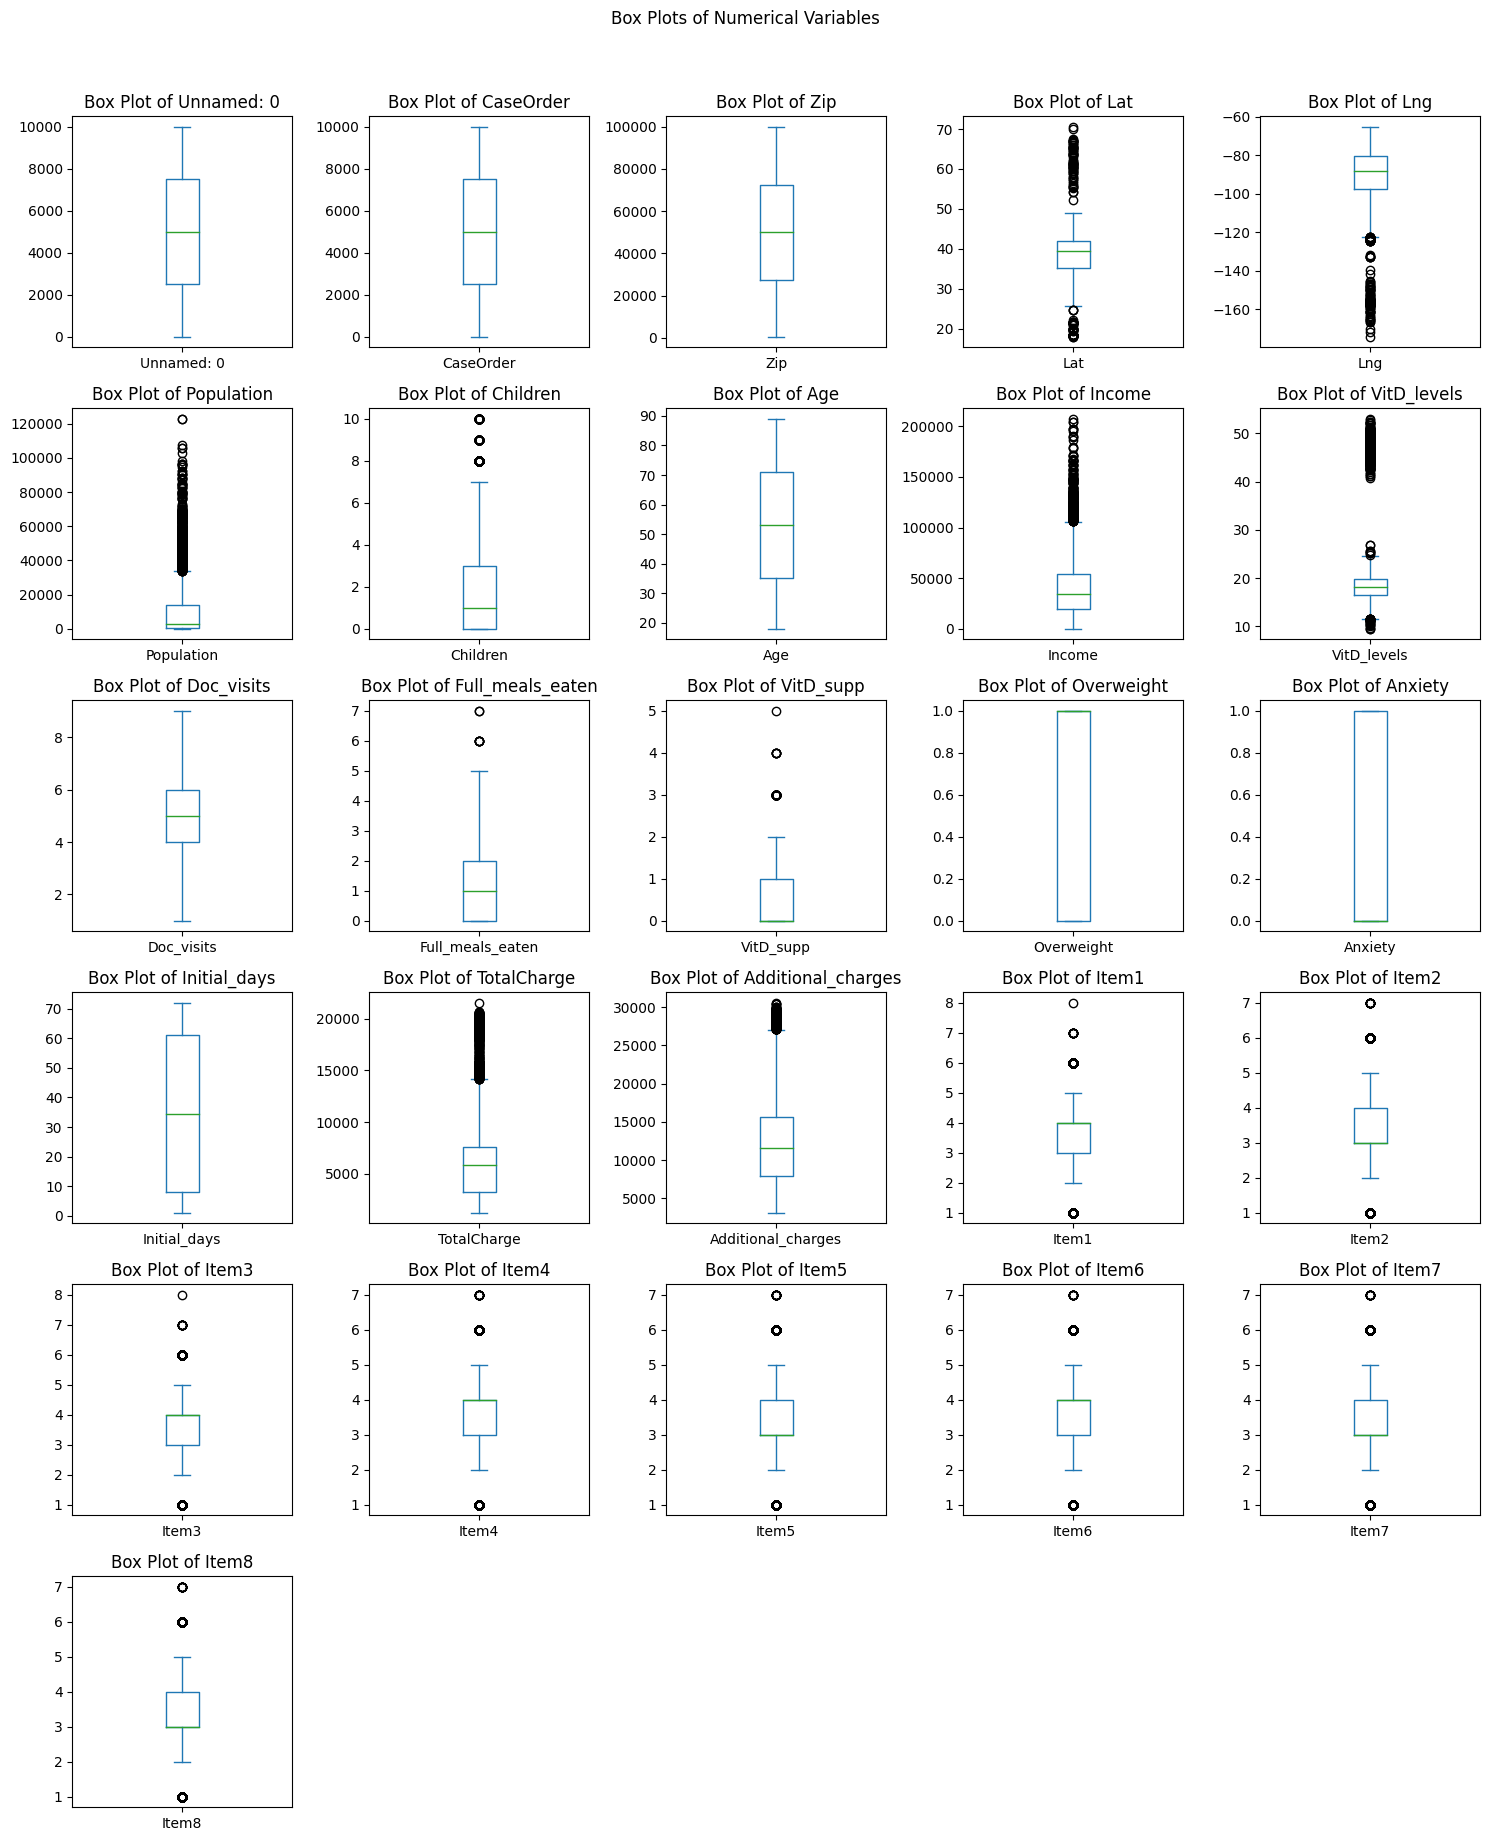

In [ ]:
# Number of numerical columns and columns per row
num_columns = len(numerical_columns.columns)
columns_per_row = 5  # Adjust the number of columns per row as needed

# Calculate the number of rows for the grid layout
num_rows = (num_columns + columns_per_row - 1) // columns_per_row

# Create box plots for all numerical columns in a grid layout
fig, axes = plt.subplots(nrows=num_rows, ncols=columns_per_row, figsize=(15, 3*num_rows))

for i, column in enumerate(numerical_columns.columns):
    row_idx = i // columns_per_row
    col_idx = i % columns_per_row
    numerical_columns[column].plot(kind='box', ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f"Box Plot of {column}")

# Remove any empty subplots
for i in range(num_columns, num_rows * columns_per_row):
    row_idx = i // columns_per_row
    col_idx = i % columns_per_row
    fig.delaxes(axes[row_idx, col_idx])

plt.suptitle("Box Plots of Numerical Variables", y=1.02)
plt.tight_layout()
plt.show()

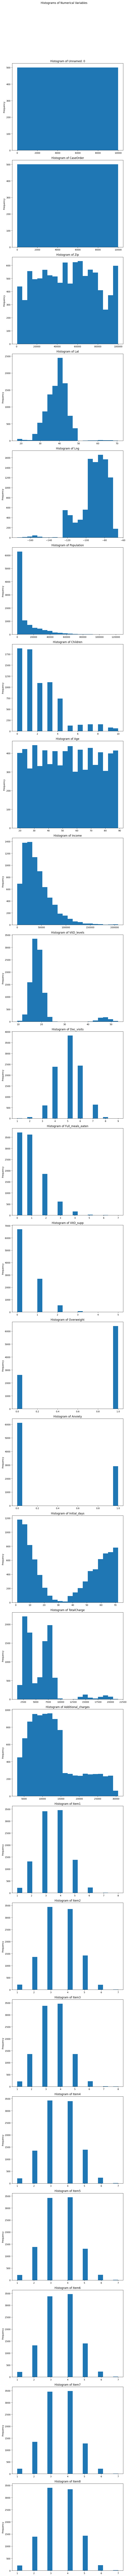

In [ ]:
# Create histograms for all numerical columns
num_plots = len(numerical_columns.columns)
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(8, 6*num_plots))

for i, column in enumerate(numerical_columns.columns):
    numerical_columns[column].plot(kind='hist', bins=20, ax=axes[i])
    axes[i].set_title(f"Histogram of {column}")
    axes[i].set_xlabel(None)  # Remove individual x-labels to avoid overlapping

plt.suptitle("Histograms of Numerical Variables", y=1.02)
plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots
plt.tight_layout()
plt.show()

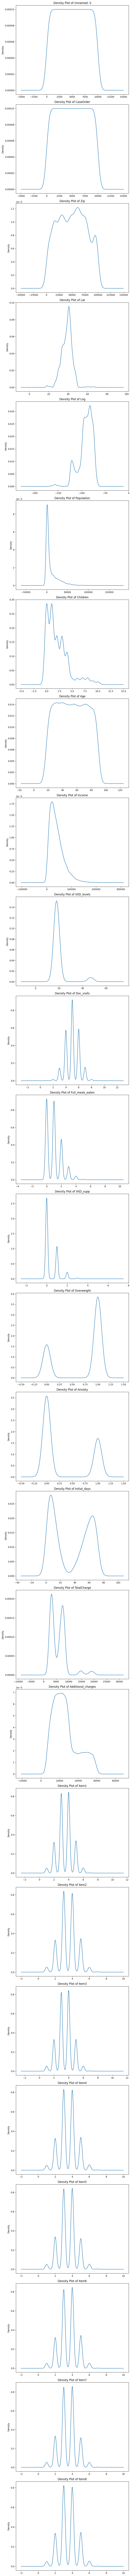

In [ ]:
numerical_columns = df.select_dtypes(include='number')

# Create density plots (Kernel Density Estimation) for all numerical columns
num_plots = len(numerical_columns.columns)
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(8, 6*num_plots))

for i, column in enumerate(numerical_columns.columns):
    numerical_columns[column].plot(kind='density', ax=axes[i])
    axes[i].set_title(f"Density Plot of {column}")

plt.tight_layout()
plt.show()

##### **Missing Value Patterns**

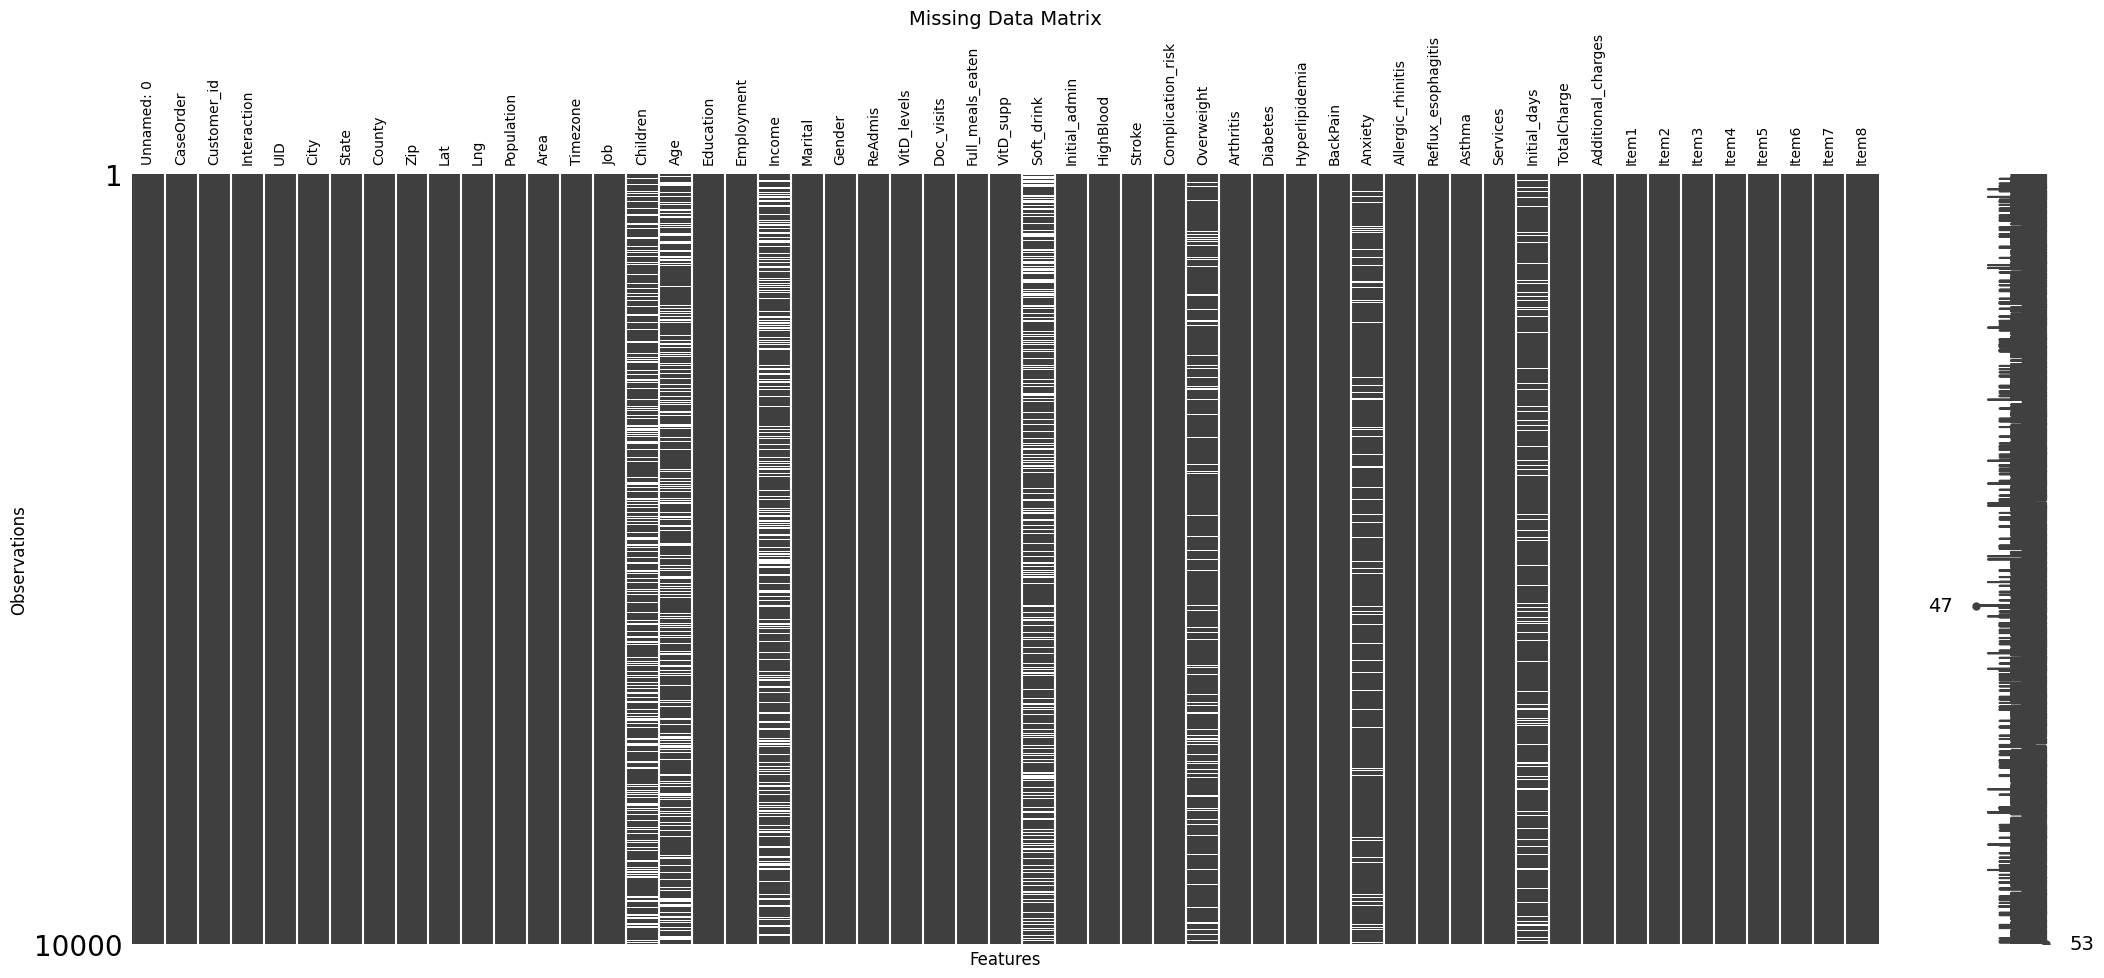

In [ ]:
matrix_plot = msno.matrix(df)

# Get the column labels (feature names)
column_labels = df.columns

plt.xlabel('Features', fontsize=12)
plt.ylabel('Observations', fontsize=12)
plt.title('Missing Data Matrix', fontsize=14)
plt.xticks(range(len(column_labels)), column_labels, rotation=90)  # Add x-axis tick labels

# Show the plot
plt.show()


<Axes: >

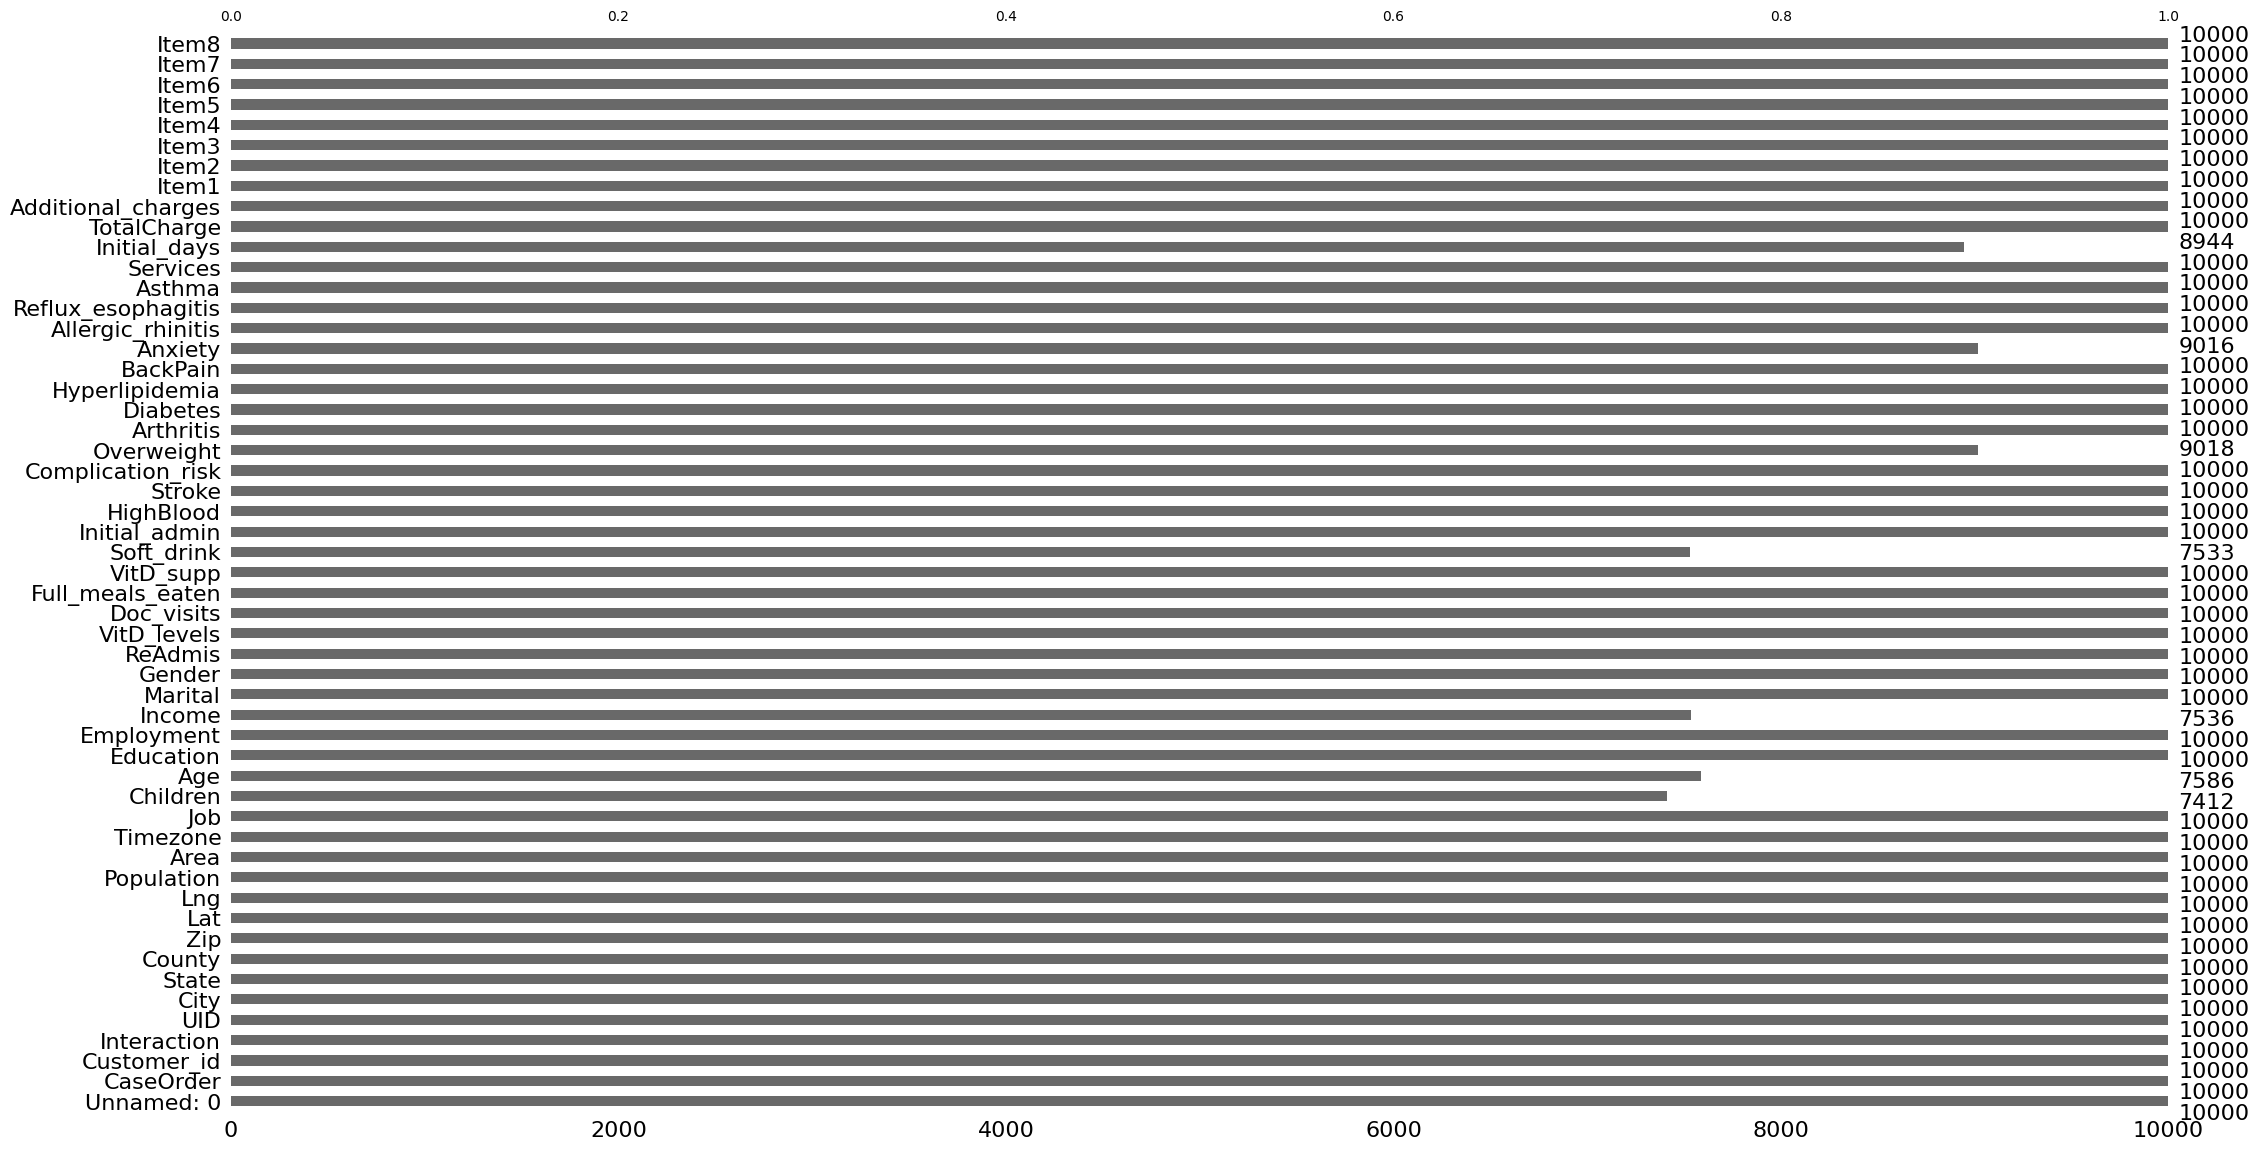

In [ ]:
msno.bar(df)      # Bar chart visualization


In [ ]:
#Identify the relationship of missing values between columns
msno.dendrogram(df, orientation='top')


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

df_encoded = pd.get_dummies(df)

# Calculate the linkage matrix using 'complete' method and 'hamming' metric
Z = linkage(df_encoded.T, method='complete', metric='hamming')

# Plot the horizontal dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=df.columns, orientation='left')
plt.title('Horizontal Dendrogram of Missing Values')
plt.xlabel('Distance')
plt.ylabel('Columns')
plt.show()

Missing values are present in 7 different columns

In [ ]:
df.isna().sum()

Unnamed: 0               0
CaseOrder                0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children              2588
Age                   2414
Education                0
Employment               0
Income                2464
Marital                  0
Gender                   0
ReAdmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink            2467
Initial_admin            0
HighBlood                0
Stroke                   0
Complication_risk        0
Overweight             982
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                 0
A

In [ ]:
# Check for rows with missing values
rows_with_missing_values = df[df.isnull().sum(axis=1) > 0]

count_missing_values = df.isnull().any(axis=1).sum()

print("Count of rows with missing values:", count_missing_values)

total_rows = df.shape[0]

# Calculate the percentage of rows with missing values
percentage_missing_values = (count_missing_values / total_rows) * 100

print("Percentage of rows with missing values:", percentage_missing_values, "%")

Count of rows with missing values: 7687
Percentage of rows with missing values: 76.87 %


In [ ]:
# Check for rows with multiple missing values
rows_with_two_or_more_missing = df[df.isnull().sum(axis=1) >= 2]
rows_with_three_or_more_missing = df[df.isnull().sum(axis=1) >= 3]
rows_with_four_or_more_missing = df[df.isnull().sum(axis=1) >= 4]
rows_with_five_or_more_missing = df[df.isnull().sum(axis=1) >= 5]
rows_with_six_or_more_missing = df[df.isnull().sum(axis=1) >= 6]
rows_with_seven_or_more_missing = df[df.isnull().sum(axis=1) >= 7]

# Get count of rows with two or more missing values
count_rows_with_two_or_more_missing = len(df[df.isnull().sum(axis=1) >= 2])

# Get count of rows with three or more missing values
count_rows_with_three_or_more_missing = len(df[df.isnull().sum(axis=1) >= 3])

# Get count of rows with four or more missing values
count_rows_with_four_or_more_missing = len(df[df.isnull().sum(axis=1) >= 4])

# Get count of rows with five or more missing value
count_rows_with_five_or_more_missing = len(df[df.isnull().sum(axis=1) >= 5])

# Get count of rows with six or more missing value
count_rows_with_six_or_more_missing = len(df[df.isnull().sum(axis=1) >= 6])

# Get count of rows with five or more missing value
count_rows_with_seven_or_more_missing = len(df[df.isnull().sum(axis=1) >= 7])


print("Count of rows with two or more missing values:", count_rows_with_two_or_more_missing)
print("Count of rows with three or more missing values:", count_rows_with_three_or_more_missing)
print("Count of rows with four or more missing values:", count_rows_with_four_or_more_missing)
print("Count of rows with five or more missing values:", count_rows_with_five_or_more_missing)
print("Count of rows with six or more missing values:", count_rows_with_six_or_more_missing )
print("Count of rows with seven or more missing values:", count_rows_with_seven_or_more_missing)



Count of rows with two or more missing values: 3789
Count of rows with three or more missing values: 1219
Count of rows with four or more missing values: 237
Count of rows with five or more missing values: 22
Count of rows with six or more missing values: 1
Count of rows with seven or more missing values: 0


In [ ]:
rows_with_five_or_more_missing

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
192,193,193,P165814,6fa35d15-2c60-4250-8e04-ab36c9d810ba,7e61fbd0b029abbbc81b59e0e5867987,Liberty Center,IN,Wells,46766,40.71204,-85.28477,865,Suburban,America/Indiana/Indianapolis,Sports coach,NaN,NaN,Regular High School Diploma,Full Time,NaN,Divorced,Female,No,19.517493,5,1,0,NaN,Emergency Admission,Yes,No,Medium,1.0,Yes,No,No,No,NaN,Yes,No,Yes,Intravenous,1.028205,2472.817655,22040.917470,3,4,4,5,4,3,4,4
292,293,293,U325503,3908e8c3-8453-4197-b47d-cfebfc30e348,db6d501f4135c61326945dbe705da6e3,Peytona,WV,Boone,25154,38.11700,-81.70497,582,Rural,America/New_York,Trade union research officer,NaN,NaN,"Some College, 1 or More Years, No Degree",Full Time,NaN,Married,Male,No,14.251164,7,0,0,NaN,Emergency Admission,Yes,Yes,Medium,1.0,Yes,No,Yes,Yes,NaN,Yes,No,Yes,Blood Work,26.094601,4964.499903,16895.368300,3,3,3,4,3,4,4,4
1177,1178,1178,F979938,792c513b-6a26-4296-9392-eb16b970a5da,5d6e4b04462b2131bbc993a1ab115ba6,Grand Junction,CO,Mesa,81506,39.11585,-108.53246,11799,Suburban,America/Denver,"Engineer, electrical",NaN,NaN,"Some College, 1 or More Years, No Degree",Student,NaN,Never Married,Female,No,19.338186,4,0,1,NaN,Observation Admission,No,No,Low,1.0,No,Yes,Yes,No,NaN,No,No,No,Intravenous,13.673667,3620.379709,7324.539487,2,2,2,4,2,4,3,3
1215,1216,1216,F54388,62c1ea6d-3913-438e-872f-9f8d51bcbf1f,a4d849951263a259d1d18aaab7f3c702,Lewistown,PA,Mifflin,17044,40.57840,-77.59430,21047,Suburban,America/New_York,"Teacher, secondary school",1.0,NaN,Associate's Degree,Full Time,826.01,Separated,Male,No,19.455420,2,0,0,NaN,Elective Admission,No,Yes,Low,NaN,No,No,Yes,No,NaN,No,No,Yes,Blood Work,NaN,3201.958286,5986.913483,4,4,3,3,4,2,5,2
1989,1990,1990,W646888,33faddfa-d4cb-40a8-802b-985fcac39e8b,a19e52d878627128cbe6462d28b30edc,West Newton,IN,Marion,46183,39.65280,-86.28160,15,Rural,America/Indiana/Indianapolis,"Scientist, biomedical",NaN,NaN,"Some College, 1 or More Years, No Degree",Full Time,NaN,Separated,Male,No,17.737772,8,0,0,No,Emergency Admission,No,Yes,High,1.0,No,Yes,No,No,NaN,Yes,No,No,Blood Work,NaN,3351.019270,6586.488870,5,4,5,3,4,4,3,2
2925,2926,2926,N691392,a73cf155-6b21-4415-aae8-ac2939862d9e,48e5392d0a06b109ed2cd29947e71297,Sadler,TX,Grayson,76264,33.73974,-96.83528,1508,Rural,America/Chicago,Homeopath,NaN,NaN,GED or Alternative Credential,Full Time,NaN,Married,Female,No,18.480603,5,2,0,No,Elective Admission,No,No,High,1.0,No,No,No,No,NaN,Yes,No,No,Intravenous,NaN,4005.349965,12776.266060,2,3,4,3,3,3,3,1
3718,3719,3719,C425801,42c6bf11-ed99-43ad-b8cd-3b62ac5ac0c5,b37d1b8e6fa302c947682f3f4d1ba49f,Marietta,GA,Cobb,30008,33.89630,-84.58925,31982,Rural,America/New_York,Photographer,4.0,NaN,Bachelor's Degree,Full Time,NaN,Divorced,Female,No,16.301610,6,2,0,NaN,Emergency Admission,No,No,Low,NaN,No,No,Yes,Yes,1.0,No,No,No,Blood Work,NaN,4104.078624,4389.512479,3,3,3,2,3,3,4,3
4014,4015,4015,X526907,033dfb05-fb84-4e37-b601-c45079d2c106,6a1c247257421c2b389253696450167b,Dixonville,PA,Indiana,15734,40.72485,-79.00127,467,Suburban,America/New_York,"Administrator, charities/voluntary organisations",1.0,NaN,"9th Grade to 12th Grade, No Diploma",Full Time,NaN,Widowed,Female,No,15.968003,4,0,0,NaN,Observation Admission,Yes,No,Medium,NaN,No,No,Yes,No,NaN,No,No,No,Intravenous,14.489697,2996.086015,21535.069150,4,3,3,4,4,3,4,4
4271,4272,4272,H662750,faf29a9a-e5f8-4c25-ab2c-3f786beb79ce,272ffe5b83f7a634c128573f31bef4a0,West York,IL,Crawford,62478,39.17838,-87.74266,389,Rural,America/Chicago,Insurance claims handler,NaN,NaN,"Some College, 1 or More Years, No D

##### **Check for Duplicated Rows**

Checking for duplicate rows using the duplicated() function and counting the occurrences of duplicates using sum()

In [ ]:
# Check for duplicate rows
duplicate_rows = df.duplicated()

# Count the occurrences of duplicates
num_duplicates = duplicate_rows.sum()

print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


# **Part III: Data Cleaning**

# Section D: Data Cleaning Process Summary


### D1: Findings on Data Quality Issues Describe the data quality issues found during the implementation of the data-cleaning plan.


### D2: Justification for Data Quality Mitigation Methods Explain the methods used to mitigate the data quality issues.

 Subsection D3: Outcome of Each Data-Cleaning Step Summarize the results from each step of the data-cleaning process.

Subsection D4: Annotated Code for Mitigating Data Quality Issues Provide the annotated code used to mitigate data quality issues.

Subsection D5: Cleaned Dataset Include a link or attach the cleaned dataset as a CSV file.

 Subsection D6: Limitations of Data Cleaning Process Discuss the limitations of the data cleaning process.

Subsection D7: Impact of Limitations on Analysis Discuss how the limitations could affect the analysis of the question or decision from Section A.

Section E: Application of Principal Component Analysis (PCA)
Subsection E1: Principal Components Identification
Identify the total number of principal components.
Provide the output of the principal components loading matrix.
Subsection E2: Justification for Reduced Number of Principal Components
Justify the reduced number of principal components.
Include a screenshot of a scree plot.
Subsection E3: Benefits of PCA
Discuss how the organization would benefit from the use of PCA.


Part IV: Supporting Documents
Section F: Video Demonstration
Provide a link to the Panopto video recording that demonstrates the functionality of the code.
Section G: Acknowledgement of Third-Party Code
Acknowledge web sources for third-party code used in the application.
Section H: Acknowledgement of Content Sources
Acknowledge sources for quoted, paraphrased, or summarized content.
